In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

In [12]:
df_train = pd.read_csv('train.csv')

In [13]:
df_train.LotFrontage = df_train.LotFrontage.fillna(0)
df_train.Alley = df_train.Alley.fillna('SinCall')
df_train.Utilities = df_train.Utilities.fillna('AllPub')
df_train.Exterior1st = df_train.Exterior1st.fillna(stat.mode(df_train.Exterior1st))
df_train.Exterior2nd = df_train.Exterior2nd.fillna(stat.mode(df_train.Exterior2nd))
df_train.MasVnrType = df_train.MasVnrType.fillna(stat.mode(df_train.MasVnrType))
df_train.MasVnrType= df_train.MasVnrType.replace('None','Ninguno')
df_train['MasVnrArea'] = df_train.apply(lambda x: 0 if x.MasVnrType == 'Ninguno' else x.MasVnrArea, axis=1)
df_train.BsmtQual = df_train.BsmtQual.fillna('SNS')
df_train['BsmtCond'] = df_train.apply(lambda x: 'SNS' if x.BsmtQual == 'SNS' else x.BsmtCond, axis=1)
df_train['BsmtExposure'] = df_train.apply(lambda x: 'SNS' if x.BsmtQual == 'SNS' else x.BsmtExposure, axis=1)
df_train.BsmtExposure = df_train.apply(lambda x: stat.mode(df_train[df_train.BsmtCond == x.BsmtCond]['BsmtExposure']) if pd.isna(x.BsmtExposure) else x.BsmtExposure, axis=1)
df_train['BsmtFinType1'] = df_train.apply(lambda x: 'SNS' if x.BsmtQual == 'SNS' else x.BsmtFinType1, axis=1)
df_train['BsmtFinType2'] = df_train.apply(lambda x: 'SNS' if x.BsmtQual == 'SNS' else x.BsmtFinType2, axis=1)
df_train.BsmtFinType2 = df_train.apply(lambda x: stat.mode(df_train[df_train.BsmtCond == x.BsmtCond]['BsmtFinType2']) if pd.isna(x.BsmtFinType2) else x.BsmtFinType2, axis=1)
df_train.Electrical = df_train.Electrical.fillna(stat.mode(df_train.Electrical))
df_train.FireplaceQu = df_train.FireplaceQu.fillna('SNCH')
df_train.GarageType = df_train.GarageType.fillna('SNGAR')
df_train['GarageQual'] = df_train.apply(lambda x: 'SNGAR' if x.GarageType == 'SNGAR' else x.GarageQual, axis=1)
df_train['GarageCond'] = df_train.apply(lambda x: 'SNGAR' if x.GarageType == 'SNGAR' else x.GarageCond, axis=1)
df_train['GarageFinish'] = df_train.apply(lambda x: 'SNGAR' if x.GarageType == 'SNGAR' else x.GarageFinish, axis=1)
df_train.PoolQC = df_train.PoolQC.fillna('SNP')
df_train.Fence = df_train.Fence.fillna('SNCER')
df_train.MiscFeature = df_train.MiscFeature.fillna('SNFEA')
#df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(0)

In [14]:
df_train[df_train.GarageType == 'SNGAR'][['YearBuilt', 'YearRemodAdd', 'GarageType','GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageType,GarageYrBlt
39,1955,1955,SNGAR,NaN
48,1920,2008,SNGAR,NaN
78,1968,1968,SNGAR,NaN
88,1915,1982,SNGAR,NaN
89,1994,1995,SNGAR,NaN
...,...,...,...,...
1349,1872,1987,SNGAR,NaN
1407,1985,1985,SNGAR,NaN
1449,1970,1970,SNGAR,NaN
1450,1974,1974,SNGAR,NaN


In [15]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,MnPrv,SNFEA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,4,2010,WD,Normal,142125


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

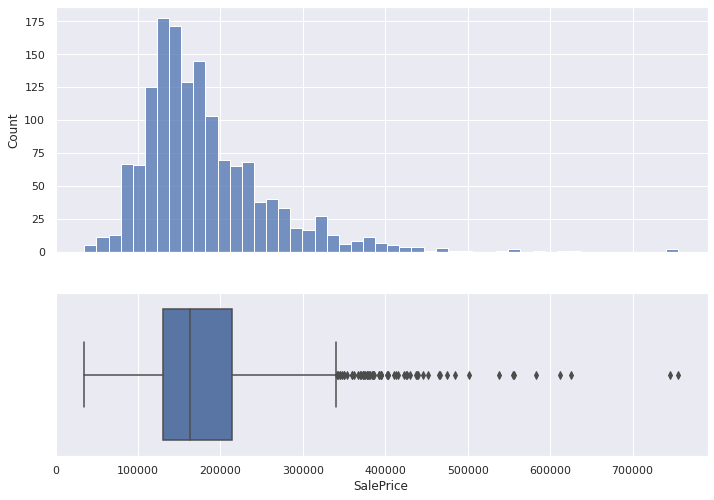

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df_train['SalePrice'], ax=ax_hist)
sns.boxplot(df_train['SalePrice'], ax=ax_box)
ax_hist.set(xlabel='')

In [17]:
Q1 = np.percentile(df_train.SalePrice, 25) 
Q3 = np.percentile(df_train.SalePrice, 75) 

IQR = Q3 - Q1

Límite_inferior = (Q1 - 1.5 * IQR)
Límite_superior = (Q3 + 1.5 * IQR)

print(f'Límite_inferior : {Límite_inferior}')
print(f'Límite_superior : {Límite_superior}')

Límite_inferior : 3937.5
Límite_superior : 340037.5


In [35]:
df_train_sin_extremos = df_train[df_train.SalePrice < Límite_superior]
df_train_sin_extremos

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,SinCall,IR1,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,MnPrv,SNFEA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,SinCall,Reg,Lvl,AllPub,...,0,SNP,SNCER,SNFEA,0,4,2010,WD,Normal,142125


Normalizacion Lineal
- OverallQual
- TotRmsAbvGrd
- GarageArea
- SalePrice

In [36]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

OverallQual_minmax = min_max_scaler.fit_transform(df_train_sin_extremos[['OverallQual']])
df_train_sin_extremos = df_train_sin_extremos.assign(Nor_OverallQual_minmax = OverallQual_minmax)

TotRmsAbvGrd_minmax = min_max_scaler.fit_transform(df_train_sin_extremos[['TotRmsAbvGrd']])
df_train_sin_extremos = df_train_sin_extremos.assign(Nor_TotRmsAbvGrd_minmax = TotRmsAbvGrd_minmax)

GarageArea_minmax = min_max_scaler.fit_transform(df_train_sin_extremos[['GarageArea']])
df_train_sin_extremos = df_train_sin_extremos.assign(Nor_GarageArea_minmax = GarageArea_minmax)

SalePrice_minmax = min_max_scaler.fit_transform(df_train_sin_extremos[['SalePrice']])
df_train_sin_extremos = df_train_sin_extremos.assign(Nor_SalePrice_minmax = SalePrice_minmax)

<AxesSubplot:>

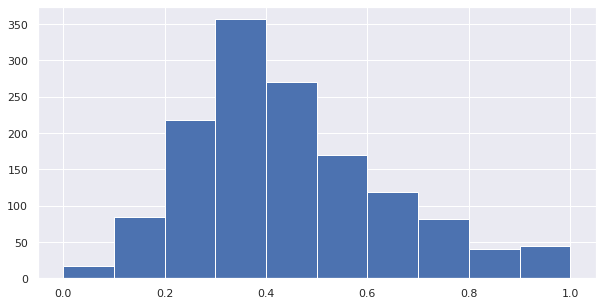

In [40]:
df_train_sin_extremos.Nor_SalePrice_minmax.hist(figsize=(10,5))

In [ ]:
SalePrice

Normalizacion No Lineal
- OverallCond
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch


Investigar las variables de año
- YearBuilt
- YearRemodAdd
- YrSold

Investigar por que estas pueden ser categoricas
- MSSubClass

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ca88cd5-d9cc-4716-8d32-a384710d5eb3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>